## Tataksh Bhagat
### 102003033

In [ ]:
import numpy as np
import pandas as pd

### Question 1

(Based on Step-by-Step Implementation of Ridge Regression using Gradient
Descent Optimization)
Generate a dataset with atleast seven highly correlated columns and a target variable.<br>
Implement Ridge Regression using Gradient Descent Optimization. Take different
values of learning rate (such as 0.0001,0.001,0.01,0.1,1,10) and regularization
parameter (10-15,10-10,10-5
,10- 3
,0,1,10,20). Choose the best parameters for which ridge

regression cost function is minimum and R2_score is maximum.

In [2]:
q1 = pd.read_csv("/content/final.csv - Sheet1.csv")

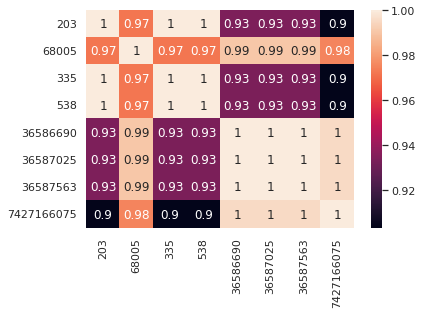

In [3]:
import seaborn as sns; sns.set_theme()
corr = q1.corr()
corr
ax = sns.heatmap(corr, annot=True)

In [12]:
Y=q1.iloc[:,0]
X=q1.iloc[:,1:]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=43)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
# Appending a column of 1 to consider beta[0][0]
X_train_inserting = np.insert(X_train_scaled,0,1,axis=1)
X_test_inserting = np.insert(X_test_scaled,0,1,axis=1)
Y_train = Y_train.reset_index(drop=True)

In [18]:
lr = [0.0001,0.001,0.01,0.1,1,10]
lamdas = [10-15,10-10,10-5,10- 3,0,1,10,20]
Score = []
n=236

In [19]:
from sklearn.metrics import r2_score
for lamda in lamdas:
  for learning_rate in lr:
    beta=np.zeros(8)
    number_of_iterations=100
    for i in range(number_of_iterations):
        x0_gradient=0
        x1_gradient=0
        x2_gradient=0
        x3_gradient=0
        x4_gradient=0
        x5_gradient=0 
        x6_gradient=0
        x7_gradient=0    
        for j in range(len(X_train)):
          a=X_train_inserting[j,0]
          b=X_train_inserting[j,1]
          c=X_train_inserting[j,2]
          d=X_train_inserting[j,3]
          e=X_train_inserting[j,4]
          f=X_train_inserting[j,5]
          g=X_train_inserting[j,6]
          h=Y_train[j]
          x0_gradient+=(beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)
          x1_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*a)
          x2_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*b)
          x3_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*c)
          x4_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*d)
          x5_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*e)
          x6_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*f)
          x7_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*g)
        beta[0]=beta[0]-learning_rate/n*(x0_gradient+lamda*beta[0])
        beta[1]=beta[1]-learning_rate/n*(x1_gradient+lamda*beta[1])
        beta[2]=beta[2]-learning_rate/n*(x2_gradient+lamda*beta[2])
        beta[3]=beta[3]-learning_rate/n*(x3_gradient+lamda*beta[3])
        beta[4]=beta[4]-learning_rate/n*(x4_gradient+lamda*beta[4])
        beta[5]=beta[5]-learning_rate/n*(x5_gradient+lamda*beta[5])
        beta[6]=beta[6]-learning_rate/n*(x6_gradient+lamda*beta[6])
        beta[7]=beta[7]-learning_rate/n*(x7_gradient+lamda*beta[7])
        y_pred = X_test_inserting.dot(beta)
        Score.append({'lamda':lamda,'lr':learning_rate,'score':r2_score(y_pred,Y_test),'beta':beta})

In [22]:
maxScore = 0
for i in Score:
  maxScore = max(maxScore,i['score'])
finalBeta = [final['beta'] for final in Score if final['score'] == maxScore]
finalLambda = [final['lamda'] for final in Score if final['score'] == maxScore]

finalBeta = finalBeta[0]

In [21]:
finalBeta

array([ 62.48263227,  62.48263227,  14.45267756,  77.74941046,
        77.52164176, -19.26605933, -19.26584296, -19.26549765])

In [33]:
Y_predict_gradient = X_test_inserting.dot(finalBeta)

In [34]:
error_ridge = Y_test - Y_predict_gradient
sum_square_error_ridge =np.sum(np.power(error_ridge,2))
mean_square_error_ridge =sum_square_error_ridge/len(Y_predict_gradient)
rms_error_ridge=np.sqrt(mean_square_error_ridge)
Y_mean_ridge = np.mean(Y_test)
total_variance_ridge = np.sum((Y_test-Y_mean_ridge)**2)
x = 1-sum_square_error_ridge/total_variance_ridge
print("The R2_score is: ", x*100)

The R2_score is:  48.63723945724296


In [ ]:
#

In [24]:
finalLambda

[-5]

In [25]:
lamda = finalLambda
A_ridge = X_train_inserting.T.dot(X_train_inserting)
I_ridge = np.identity(A_ridge.shape[0])
B_ridge = np.linalg.inv(np.add(A_ridge,lamda*I_ridge))
C_ridge = B_ridge.dot(X_train_inserting.T)
beta_ridge = C_ridge.dot(Y_train)
Y_predict_ridge = X_test_inserting.dot(beta_ridge)

In [35]:
error_ridge = Y_test - Y_predict_ridge
square_error_ridge = np.power(error_ridge,2)
sum_square_error_ridge =np.sum(square_error_ridge)
mean_square_error_ridge =sum_square_error_ridge/len(Y_predict_ridge)
rms_error_ridge=np.sqrt(mean_square_error_ridge)
Y_mean_ridge = np.mean(Y_test)
total_variance_ridge = np.sum((Y_test-Y_mean_ridge)**2)
x = 1-sum_square_error_ridge/total_variance_ridge
print("The R2_score is: ", x*100)

The R2_score is:  65.72979623843453


# Question 2


In [ ]:
dataset = pd.read_csv("/content/Hitters.csv")

In [ ]:
dataset

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


##(a) Pre-process the data (null values, noise, categorical to numerical encoding)<br>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

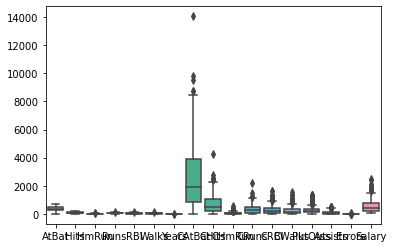

In [ ]:
import seaborn as sns
sns.boxplot(data = dataset)

In [ ]:
dataset["Salary"].mean()

535.9258821292775

In [ ]:
dataset["Salary"].median()

425.0

In [ ]:
# replace NaN values with central tendency: mean
dataset['Salary'] = dataset['Salary'].replace(np.nan, dataset["Salary"].mean())

In [ ]:
# categorical to numerical encoding

In [ ]:
print(dataset.Division.unique())
print(dataset.League.unique())
print(dataset.NewLeague.unique())

['E' 'W']
['A' 'N']
['A' 'N']


In [ ]:
# using label encoding 

# E = 1 ; W = 0
dataset['Division'].replace("E", 1, inplace = True)
dataset['Division'].replace("W", 0, inplace = True)

# A = 1 ; N = 0
dataset['League'].replace("A", 1, inplace = True)
dataset['League'].replace("N", 0, inplace = True)
dataset['NewLeague'].replace("A", 1, inplace = True)
dataset['NewLeague'].replace("N", 0, inplace = True)

In [ ]:
dataset

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,1,1,446,33,20,535.925882,1
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.000000,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.000000,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.000000,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,0,1,325,9,3,700.000000,0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,1,1,313,381,20,875.000000,1
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,1,0,37,113,7,385.000000,1
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1,1,1314,131,12,960.000000,1



## (b) Separate input and output features and perform scaling<br>


In [ ]:
# split data
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.25, random_state = 42 )

In [ ]:
from sklearn.preprocessing import StandardScaler
# create object
scaler = StandardScaler()

# to avoid data leakage:
# fit transformm for training data
X_train_scaled = scaler.fit_transform(X_train)
# fit for test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# add a column of one for beta 0 coeff
X_train_scaled = np.insert(X_train_scaled, 0, 1,axis =1)
X_test_scaled = np.insert(X_test_scaled, 0, 1,axis = 1)

##(c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use regularization parameter as 0.5748) regression function on the dataset.<br>


###linear

In [ ]:
# Finding Regression Coefficients

# Compute the regression coefficients for which 
# mean least square error is minimum.

# LSE method, the mean square error is minimum when ￼
# B^ = inv(Xt X) Xt y
A=X_train_scaled.T.dot(X_train_scaled)
B=np.linalg.inv(A)
C=B.dot(X_train_scaled.T)
beta=C.dot(Y_train)
# print("the Beta values for the features are:")
# print(beta)

In [ ]:
#  Predicting values on test set
# It is done by multiplying X_test set with optimal Beta matrix
Y_predict = X_test_scaled.dot(beta)

In [ ]:
# Performance Evaluation

#computing error between the predicted and actual values

# Error
error = Y_test - Y_predict

# Sum square Error
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)

# Mean Square Error
# rme = [sum(y-y^)^2] /n
mean_square_error=sum_square_error/len(Y_predict)
print("The mean square error is: ", mean_square_error)

# Root Mean Square Error
# rsme = root rme)
rms_error=np.sqrt(mean_square_error)
print("The root mean square error is: ", rms_error)

# R2_score
Y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-Y_mean)**2)
print("The R2_score is: ", 1-sum_square_error/total_variance)

The mean square error is:  0.06604119355775616
The root mean square error is:  0.25698481192038597
The R2_score is:  0.7288508942850825


###ridge

In [ ]:
lamda = 0.5748
A_ridge = X_train_scaled.T.dot(X_train_scaled)
I_ridge = np.identity(A_ridge.shape[0])
B_ridge = np.linalg.inv(np.add(A_ridge,lamda*I_ridge))
C_ridge = B_ridge.dot(X_train_scaled.T)
beta_ridge = C_ridge.dot(Y_train)

In [ ]:
#  Predicting values on test set
# It is done by multiplying X_test set with optimal Beta matrix
Y_predict_ridge = X_test_scaled.dot(beta_ridge)

###lasso

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.25, random_state = 42 )

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
lasso_regression=Lasso(alpha=0.5478)
lasso_regression.fit(X_train,Y_train)
y_predict_lasso=lasso_regression.predict(X_test)


##(d)  Evaluate the performance of each trained model on test set. Which model performs the best and Why? <br>

In [ ]:
# Performance Evaluation

#computing error between the predicted and actual values

# Error
error_ridge = Y_test - Y_predict_ridge

# Sum square Error
square_error_ridge = np.power(error_ridge,2)
sum_square_error_ridge =np.sum(square_error_ridge)

# Mean Square Error
# rme = [sum(y-y^)^2] /n
mean_square_error_ridge =sum_square_error_ridge/len(Y_predict_ridge)
print("The mean square error is: ", mean_square_error_ridge)

# Root Mean Square Error
# rsme = root rme)
rms_error_ridge=np.sqrt(mean_square_error_ridge)
print("The root mean square error is: ", rms_error_ridge)

# R2_score
Y_mean_ridge = np.mean(Y_test)
total_variance_ridge = np.sum((Y_test-Y_mean_ridge)**2)
print("The R2_score is: ", 1-sum_square_error_ridge/total_variance_ridge)

The mean square error is:  0.0663872480678703
The root mean square error is:  0.2576572297993408
The R2_score is:  0.7274300784898016


In [ ]:
lasso_regression.score(X_test,Y_test)
# r2_score(Y_test, y_predict_lasso)

-0.06704086344129512

#Question 3

Cross Validation for Ridge and Lasso Regression
Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV)
function of Python. Implement both on Boston House Prediction Dataset (load_boston
dataset from sklearn.datasets).


In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X,y = load_boston(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
rid = RidgeCV([1e-3,1e-2,1e-1,1],cv=5).fit(X_train,y_train)
predictions = rid.predict(X_test)
r2_score(predictions,y_test)
rid.score(X_test,y_test)

0.7635045352106553

In [ ]:
las = LassoCV(alphas=[1e-3,1e-2,1e-1,1],cv=5).fit(X_train,y_train)
predictions = las.predict(X_test)
r2_score(predictions,y_test)
las.score(X_test,y_test)

0.7635005632846243